<div id="titre">
<h1 style="color:white;
  font-family:Comic Sans MS;
  font-size:3em;
  background-color:#D0573B;
  text-align:center;
  padding:10px">Méthode des moindres carrés </h1>
<div style="font-family:Comic Sans MS; background-color:black;box-shadow: 8px 8px 0px #aaa; text-align:center; width: 50%; color:white">TP  - Terminale</div>
</div>

D'après <b>The Song of Insects by Dr.G.W. Pierce, Harvard College Press</b> on y trouve une série statistique à deux variables :
- X : Nombre de gazoullis d'un criquet par minute
- Y : Température en Fahrenheit
Le fichier 'criquet.xls' contient les données associées à cette étude issue du site http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Traitement des données

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Exécuter le code suivant permettant de lire le fichier <code>criquets.xls</code> avec la bibliothèque <b>Pandas</b> de <b>Python</b>.

In [1]:
import pylab as pl
import pandas as pa

T = pa.read_excel('criquet.xls')
T

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


<span style='background-color:rgb(117, 129, 172);padding:10px'> <b>On note : </b> $X=\left(X_i\right)_{i=0..14}$ et $Y=\left(Y_i\right)_{i=0..14}$</span>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Représenter le nuage de points $\left(X_i\,,\,Y_i\right)$ associé à la table <b>T</b>.

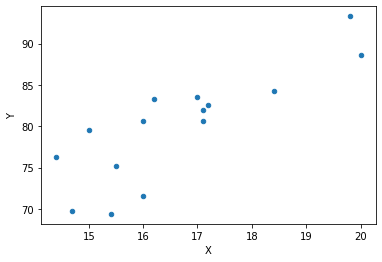

In [2]:
T.plot.scatter(x = 'X', y = 'Y')

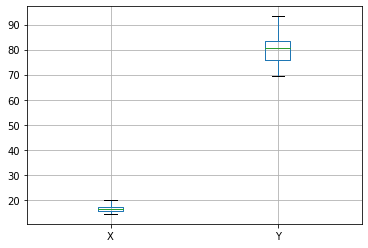

In [3]:
T.boxplot(whis = [0, 100])

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Paramètres statistiques de <b>X</b> et <b>Y</b>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Pour calculer $\overline{X}$ exécuter le code suivant

In [4]:
mx = T['X'].mean()
mx

16.653333345999997

Calculer de même $\overline{Y}$ et stocker le résultat dans <code>my</code>

In [5]:
my = T['Y'].mean()
my

80.03999989666664

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Pour calculer l'écart-type $\sigma_X$ de <b>X</b>, exécuter le code suivant

In [6]:
sx = T['X'].std(ddof = 0)
sx

1.6443302882140023

Calculer de même l'écart-type $\sigma_Y$ de <b>Y</b>

In [7]:
sy = T['Y'].std(ddof = 0)
sy

6.479897909185876

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> La variable normalisée de $X$ notée $N_X$, contient les valeurs $$x_i = \dfrac{X_i-\overline{X}}{\sigma_X}.$$
Exécuter le code suivant pour créer la colonne <b>NX</b> contenant les valeurs de $N_X$ :

In [8]:
T['NX'] = (T['X'] - mx) / sx
T.head()

,X,Y,NX
0,20.000000,88.599998,2.035276
1,16.000000,71.599998,-0.397325
2,19.799999,93.300003,1.913646
3,18.400000,84.300003,1.062236
4,17.100000,80.599998,0.271641


Ajouter à la table <b>T</b> les valeurs de la variable normalisée de $Y$ notée $N_Y$

In [9]:
T['NY'] = (T['Y'] - my) / sy
T.head()

,X,Y,NX,NY
0,20.000000,88.599998,2.035276,1.321008
1,16.000000,71.599998,-0.397325,-1.302490
2,19.799999,93.300003,1.913646,2.046329
3,18.400000,84.300003,1.062236,0.657418
4,17.100000,80.599998,0.271641,0.086421


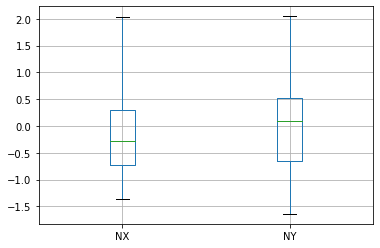

In [10]:
T.boxplot(column = ['NX', 'NY'],whis = [0, 100])

<span style='background-color:rgb(117, 129, 172);padding:10px'> <b>On note : </b> $N_X=\left(x_i \right)_{i=0..14}$ et $N_Y=\left(y_i\right)_{i=0..14}$</span>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>d.</span> Créer le nuage de points $\left(x_i\,,\,y_i\right)$

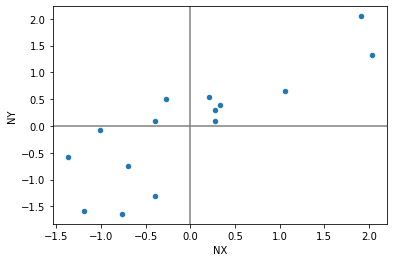

In [11]:
T.plot.scatter(x = 'NX', y = 'NY')
pl.axhline(y = 0, color = 'gray')
pl.axvline(x = 0, color = 'gray')

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>3.</span> Ajustement linéaire du nuage de points $\left(x_i\,,\,y_i\right)$ par la méthode des moindres carrés

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#D0573B">
On cherche $a$ de sorte que $$y_i\approx ax_i$$ pour tout $i$ allant de $0$ jusque $14$.</div>
</blockquote>

<div style='background-color:rgb(117, 129, 172);padding:10px'> <b>On note : </b> $r_i$ le résidu ou l'écart entre $y_i$ et $ax_i$ : $$r_i=y_i - ax_i$$ </div>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Compléter la fonction nommée <b>carrés_résidus</b> de paramètre <code>a</code> <i>(un nombre réel)</i> qui permet de calculer $$R(a)=\sum_{i=0}^{14}\left(y_i-ax_i\right)^2$$

In [12]:
def carrés_résidus(a):
    r2 = (T['NY'] - a*T['NX'])**2
    return r2.sum()

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Compléter la fonction suivante de paramètre <code>a</code> Lequel des deux nombres $R(1)$ ou $R(0.5)$ est le plus faible ?

In [13]:
carrés_résidus(1), carrés_résidus(0.5)

(4.945686389065339, 6.222843194532668)

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Compléter la fonction suivante sans paramètre qui génère $1000$ valeurs aléatoires de $a\in[0\,,\,2]$ et renvoie celle qui minimise $R(a)$.

In [14]:
from random import random

def coeff():
    m = 100
    for k in range(1000):
        a = 2*random()
        R = carrés_résidus(a)
        if R < m:
            a_min = a
            m = R
    return a_min

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Exécuter cette fonction puis interpréter le résultat obtenu

In [15]:
coeff()

0.8338749107939241

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Calculer la covariance de $X_n$ et $Y_n$, conclure.

In [16]:
cov = (T['NX'] * T['NY']).mean()
cov

0.8351437870311551

<div style='background-color:rgb(117, 129, 172);padding:10px'> On appelle $\rho$ le <b>coefficient de corrélation</b> de $X$ et $Y$. 
<br>Par définition : $$\rho = \text{cov}\left(X_n\,,\,Y_n\right)$$</div>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>d.</span> Représenter la droite d'équation $y=\rho x$ par-dessus le nuage de points $\left(x_i\,,\,y_i\right)$

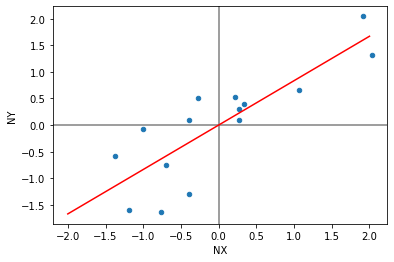

In [17]:
r = cov
T.plot.scatter(x='NX',y='NY')
pl.axvline(x = 0, color='gray')
pl.axhline(y = 0, color='gray')
pl.plot([-2 , 2],[-2*r , 2*r],color='red')

<div style='background-color:rgb(117, 129, 172);padding:10px'> La droite $\mathscr{d}$ d'équation $$y=\rho x$$ <b>ajuste au mieux</b> le nuage de points $\left(x_i\,,\,y_i\right)$.  

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>4.</span> Ajustement linéaire du nuage de points $\left(X_i\,,\,Y_i\right)$ par la méthode des moindres carrés

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#D0573B">
On cherche $a$ et $b$ de sorte que $$Y_i\approx aX_i+b$$ pour tout $i$ allant de $0$ jusque $14$.
    <br>
<ul>
    <li>On utilisera la <b>méthode des moindres carrés</b> qui consiste à trouver $a$ et $b$ qui minimisent $$r(a,b)=\sum_{i=0}^{14}\left(y_i-aX_i-b\right)^2$$</li>
    <li>Soit la droite $\mathscr{D}$ qui ajuste au mieux le nuage de points $\left(X_i\,,\,Y_i\right)$ (c'est à dire qui passe au plus près possible de ces points).
        <br><b>On admet que</b> $\mathscr{D}$ passe par le point moyen $G(\overline{X}\,,\,\overline{Y})$.
    </li>
</ul>
</blockquote>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Calculer $\rho\times\dfrac{\sigma_Y}{\sigma_X}$

In [18]:
cov * sy / sx

3.2910945679475647

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Excécuter le code pour conjecturer la valeur de $a$ qui rend minimale $r(a,b)$. 
<br> Donner une valeur approchée de $a$ arrondie au centième.

In [20]:
from ipywidgets import interact

In [21]:
@interact(a= (0,8,0.1))
def plot(a = 0):
    T.plot.scatter(x='X',y='Y')
    b = my - a * mx
    Abs = [14 , 21]
    Ord = [a * x + b for x in Abs]
    pl.plot(Abs, Ord, color = 'red')
    Carrés = (T['Y'] - a*T['X'] - b)**2
    print(Carrés.sum())

interactive(children=(FloatSlider(value=0.0, description='a', max=8.0), Output()), _dom_classes=('widget-inter…

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Conjecturer une expression de $a$ en fonction de $\rho$ et des paramètres de $X$ et de $Y$. 

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>d.</span> En déduire une équation de $\mathscr{D}$ après avoir arrondi ses coefficients au centième près.

In [19]:
a = cov * sy / sx
b = my - a * mx
round(a,2), round(b,2)

(3.29, 25.23)

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>5.</span> Prédiction

Selon le modèle établi, quelle est la température extérieure lorsque le criquet crée 19 gazoullis en l'espace d'une minute ?

In [20]:
3.29 * 19 + 25.23

87.74

<h1 style="color:white;background-color:black;text-align:center"> Module seaborn</h1>

La fonction <b>regplot</b> du module <b>seaborn</b> permet de représenter la droite qui réalise le meilleur ajustement affine de $\left(X_i\,,\,Y_i\right)$.

In [21]:
from seaborn import regplot

Text(16.653333345999997, 80.63999989666664, '$G$')

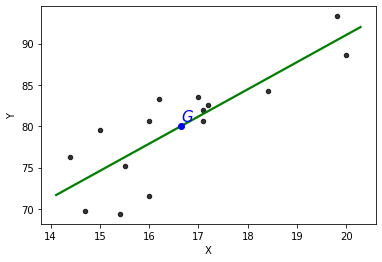

In [22]:
regplot(x = 'X', y = 'Y', ci = None, data = T , color = 'black',fit_reg = True,
        line_kws = {'color' : 'green'}, scatter_kws = {'s' : 20})
pl.plot(mx,my, 'o', color = 'blue')
pl.text(mx,my+0.6, r'$G$', color = 'blue',fontsize=15)

<h1 style="color:white;background-color:black;text-align:center"> Module scipy.stats</h1>

La fonction <b>linregress</b> du module <b>scipy.stats</b> renvoie dans l'ordre $a$ coeffcient directeur de $\mathscr{D}$ et son ordonnée à l'origine $b$. 

In [23]:
from scipy.stats import linregress

In [24]:
a, b = linregress(T['X'],T['Y'])[:2]
a, b

(3.2910945679475647, 25.232304983426026)

In [25]:
linregress(T['X'],T['Y'])

LinregressResult(slope=3.2910945679475647, intercept=25.232304983426026, rvalue=0.8351437870311552, pvalue=0.0001066718549956014, stderr=0.6011670092319252)

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>6.</span> Pertinence de la prédiction

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Calculer l'erreur commise si l'on approxime chaque valeur $Y_i$ par $\overline{Y}$.

In [26]:
erreur1 = ((T['Y'] - my)**2).sum()
erreur1

629.8361537020724

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Calculer l'erreur commise si l'on approxime chaque valeur $Y_i$ par $aX_i+b$.

In [27]:
erreur2 = ((T['Y'] - a*T['X'] - b)**2).sum()
erreur2

190.5473894234708

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Relativement à l'approximation de $Y_i\approx\overline{Y}$, quelle part représente la diminution de l'erreur de l'approximation de $Y\approx aX_i+b$ ? 

In [28]:
(erreur1 - erreur2) / erreur1

0.6974651450167398

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>d.</span> Calculer $\rho^2$, puis conjecturer un gage de qualité de l'approxximation affine.

In [29]:
r**2

0.6974651450167394